In [65]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
import plotly.tools as tls

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###거래 데이터

In [3]:
train_transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data model/train_transaction.csv', index_col='TransactionID')

In [4]:
train_transaction.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data model/test_transaction.csv', index_col='TransactionID')

In [6]:
test_transaction.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###식별 데이터

In [7]:
train_identity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data model/train_identity.csv', index_col='TransactionID')

In [8]:
train_identity.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
test_identity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data model/test_identity.csv', index_col='TransactionID')

In [10]:
test_identity.head()

,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


###데이터 확인

In [11]:
def data_check(df):
    print('rows:', df.shape[0], '/ columns:', df.shape[1])

data_check(train_transaction)
data_check(test_transaction)
data_check(train_identity)
data_check(test_identity)

rows: 590540 / columns: 393
rows: 506691 / columns: 392
rows: 144233 / columns: 40
rows: 141907 / columns: 40


###데이터 합치기

In [12]:
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index= True)

In [13]:
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index= True)

In [14]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [15]:
test.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 433 entries, isFraud to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.9+ GB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 3663549 to 4170239
Columns: 432 entries, TransactionDT to DeviceInfo
dtypes: float64(399), int64(2), object(31)
memory usage: 1.7+ GB


###결측치 확인

In [18]:
train.isnull().sum()

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 433, dtype: int64

In [19]:
test.isnull().sum()

TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8654
                   ...  
id-36             369714
id-37             369714
id-38             369714
DeviceType        369760
DeviceInfo        391634
Length: 432, dtype: int64

###결측치가 아닌 데이터 확인

In [20]:
train.notnull().sum()

isFraud           590540
TransactionDT     590540
TransactionAmt    590540
ProductCD         590540
card1             590540
                   ...  
id_36             140985
id_37             140985
id_38             140985
DeviceType        140810
DeviceInfo        118666
Length: 433, dtype: int64

In [21]:
test.notnull().sum()

TransactionDT     506691
TransactionAmt    506691
ProductCD         506691
card1             506691
card2             498037
                   ...  
id-36             136977
id-37             136977
id-38             136977
DeviceType        136931
DeviceInfo        115057
Length: 432, dtype: int64

###결측치 카운팅

In [22]:
missing_df = train.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']

In [75]:
#결측치 비율
missing_df['ratio'] = missing_df['count'] / train.shape[0]
missing_df.head(20)

,column,count,ratio
0,isFraud,0,0.000000
1,TransactionDT,0,0.000000
2,TransactionAmt,0,0.000000
3,ProductCD,0,0.000000
4,card1,0,0.000000
5,card2,8933,0.015127
6,card3,1565,0.002650
7,card4,1577,0.002670
8,card5,4259,0.007212
9,card6,1571,0.002660


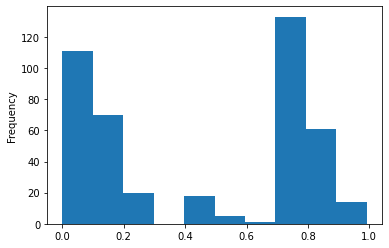

In [94]:
#결측치 시각화
missing_df['ratio'].sort_values().plot(kind='hist')

In [33]:
###결측치가 0인 칼럼
missing_df[missing_df['ratio']==0]

,column,count,ratio
0,isFraud,0,0.0
1,TransactionDT,0,0.0
2,TransactionAmt,0,0.0
3,ProductCD,0,0.0
4,card1,0,0.0
16,C1,0,0.0
17,C2,0,0.0
18,C3,0,0.0
19,C4,0,0.0
20,C5,0,0.0


##결측치가 0이 존재한다는것은 거래데이터와 식별데이터가 1:1로 대응되지 않는다는것을 뜻한다. 즉, 두 데이터를 합쳤을때 완벽히 같은 개수로 대응되지 않아 ID를 가지지못하는 데이터가 생긴다.

###결측치가 0~0.5까지의 자료들

In [99]:
missing_df[(missing_df['ratio']>0) & (missing_df['ratio']<=0.5)]

,column,count,ratio
5,card2,8933,0.015127
6,card3,1565,0.002650
7,card4,1577,0.002670
8,card5,4259,0.007212
9,card6,1571,0.002660
...,...,...,...
370,V317,12,0.000020
371,V318,12,0.000020
372,V319,12,0.000020
373,V320,12,0.000020


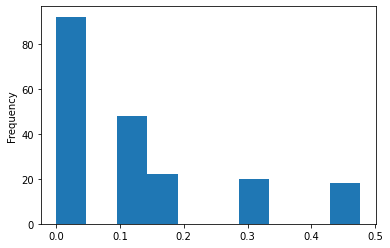

In [98]:
missing_df[(missing_df['ratio']>0) & (missing_df['ratio']<=0.5)]['ratio'].sort_values().plot(kind='hist')

In [100]:
missing_df.groupby('count').count()[missing_df.groupby('count').count()['column'] > 0.5].sort_values(['column'], ascending=[False])

,column,ratio
count,,
460110,46,46
314,43,43
12,32,32
450909,31,31
76073,23,23
...,...,...
449730,1,1
451171,1,1
451222,1,1
